# Fourier transformation

A Fourier transform (FT) decomposes a periodic function into its frequency components. The Fourier transform $g(\alpha)$ of a given function $f(x)$ is given by,
$$g(\alpha) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) e^{-i \alpha x} dx$$

The invert Fourier transforms of the fuction $g(\alpha)$ in turn gives the original function back,
$$f(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} g(\alpha) e^{i \alpha x} d\alpha$$

These two functions $g(\alpha)$ and $f(x)$ are called a pair of Fourier transforms.

By using the Euler's formula, we can write the first equation as,
$$g(\alpha) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) \left[ cos(\alpha x) - i \ sin(\alpha x) \right] dx$$
$$g(\alpha) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) cos(\alpha x) dx - \frac{i}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) sin(\alpha x) dx$$

Let,
$$u(\alpha) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) cos(\alpha x) dx$$
$$v(\alpha) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\infty} f(x) sin(\alpha x) dx$$

Therefore,
$$g(\alpha) = u(\alpha) - i \ v(\alpha)$$
$$FT(\alpha) = FT_{cos}(\alpha) - i \ FT_{sin}(\alpha)$$

Now, we can evalute the functions $u(\alpha)$ and $v(\alpha)$ seperately to get the fourier transform for $f(x)$.

## Code

In [1]:
from numpy import cos, empty, exp, pi, sin, sqrt, vectorize
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, n, retstep=False):

    # Calculating the spacing (difference) between each points
    h = (b - a) / (n - 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    # Returning the difference between each points if asked for
    if retstep:
        return points, h

    return points


In [3]:
# Importing code for Simpson's method for integration
def integrate_simpson(f, x_i, x_f, n):

    # Checking if interation using Simpson's method is possible
    if n % 2 == 0 or n < 2:
        raise ValueError(
            "Intergration using Simpson's method can only be evaluated for odd number of points greater than 2!")

    # Generating points
    x, h = generate_points(x_i, x_f, n, retstep=True)

    # Evaluating the function `f(x)` for each points
    y = f(x)

    # Declaring a variable to store the integral
    integral = 0

    # Evaluating the integral using Simpson's method
    for i in range(n):
        if i == 0 or i == (n - 1):
            integral += y[i]
        elif i % 2 == 0:
            integral += y[i] * 2
        elif i % 2 == 1:
            integral += y[i] * 4

    integral *= (h / 3)

    return integral


In [4]:
# Function for evaluating Fourier transform
def fourier_transform(f, a, b, integration_points=10**3+1):

    # Function for evaluating the cosine term of the Fourier transform
    def u(alpha):
        return (1 / sqrt(2 * pi)) * integrate_simpson(lambda x: f(x) * cos(alpha * x), a, b, integration_points)

    # Function for evaluating the sin term of the Fourier transform
    def v(alpha):
        return (1 / sqrt(2 * pi)) * integrate_simpson(lambda x: f(x) * sin(alpha * x), a, b, integration_points)

    return vectorize(u), vectorize(v)


## Examples

### $$f(x) = \begin{cases} 1, & x \in [-1, 1] \\ 0, & x \in [else] \end{cases}$$

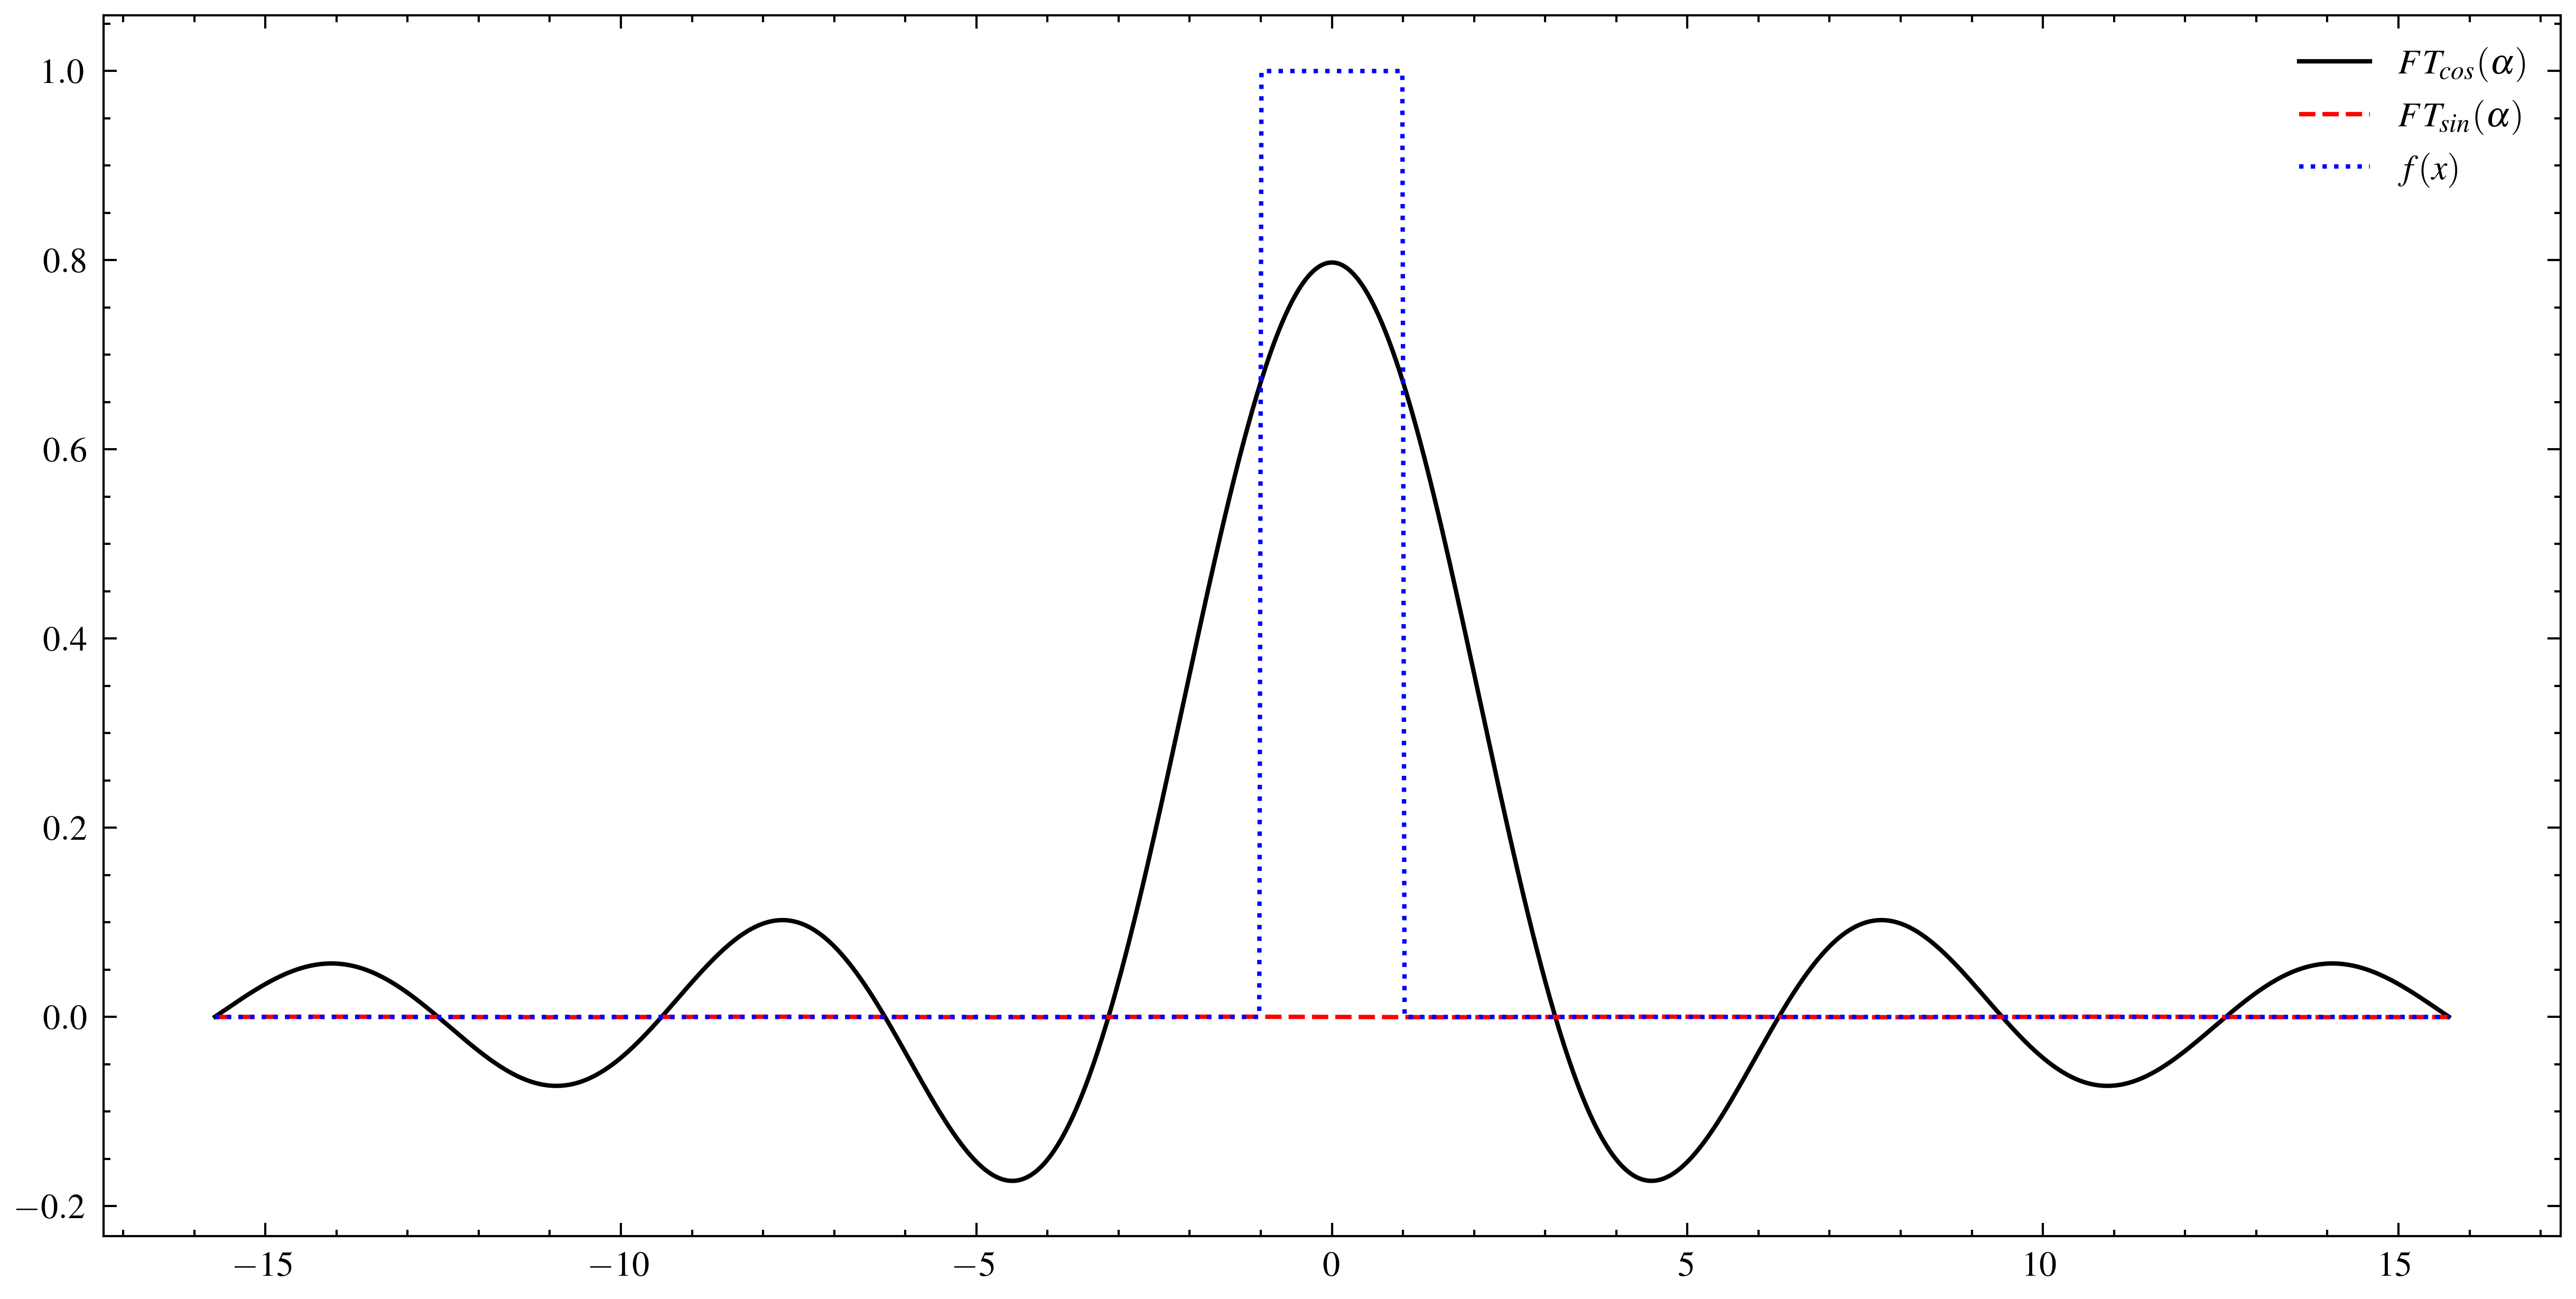

In [5]:
def f(x):
    if abs(x) <= 1:
        return 1.0
    return 0.0


f = vectorize(f)
a = - 1
b = 1

ft_u, ft_v = fourier_transform(f, a, b)

x_i = - 5 * pi
x_f = 5 * pi
n = 1000

x = generate_points(x_i, x_f, n)

plt.plot(x, ft_u(x), label="$FT_{cos}(\\alpha)$")
plt.plot(x, ft_v(x), label="$FT_{sin}(\\alpha)$")
plt.plot(x, f(x), label="$f(x)$")
plt.legend()
plt.show()


### $$f(x) = \begin{cases} 1 -|x|, & x \in [-3, 3] \\ 0, & x \in [else] \end{cases}$$

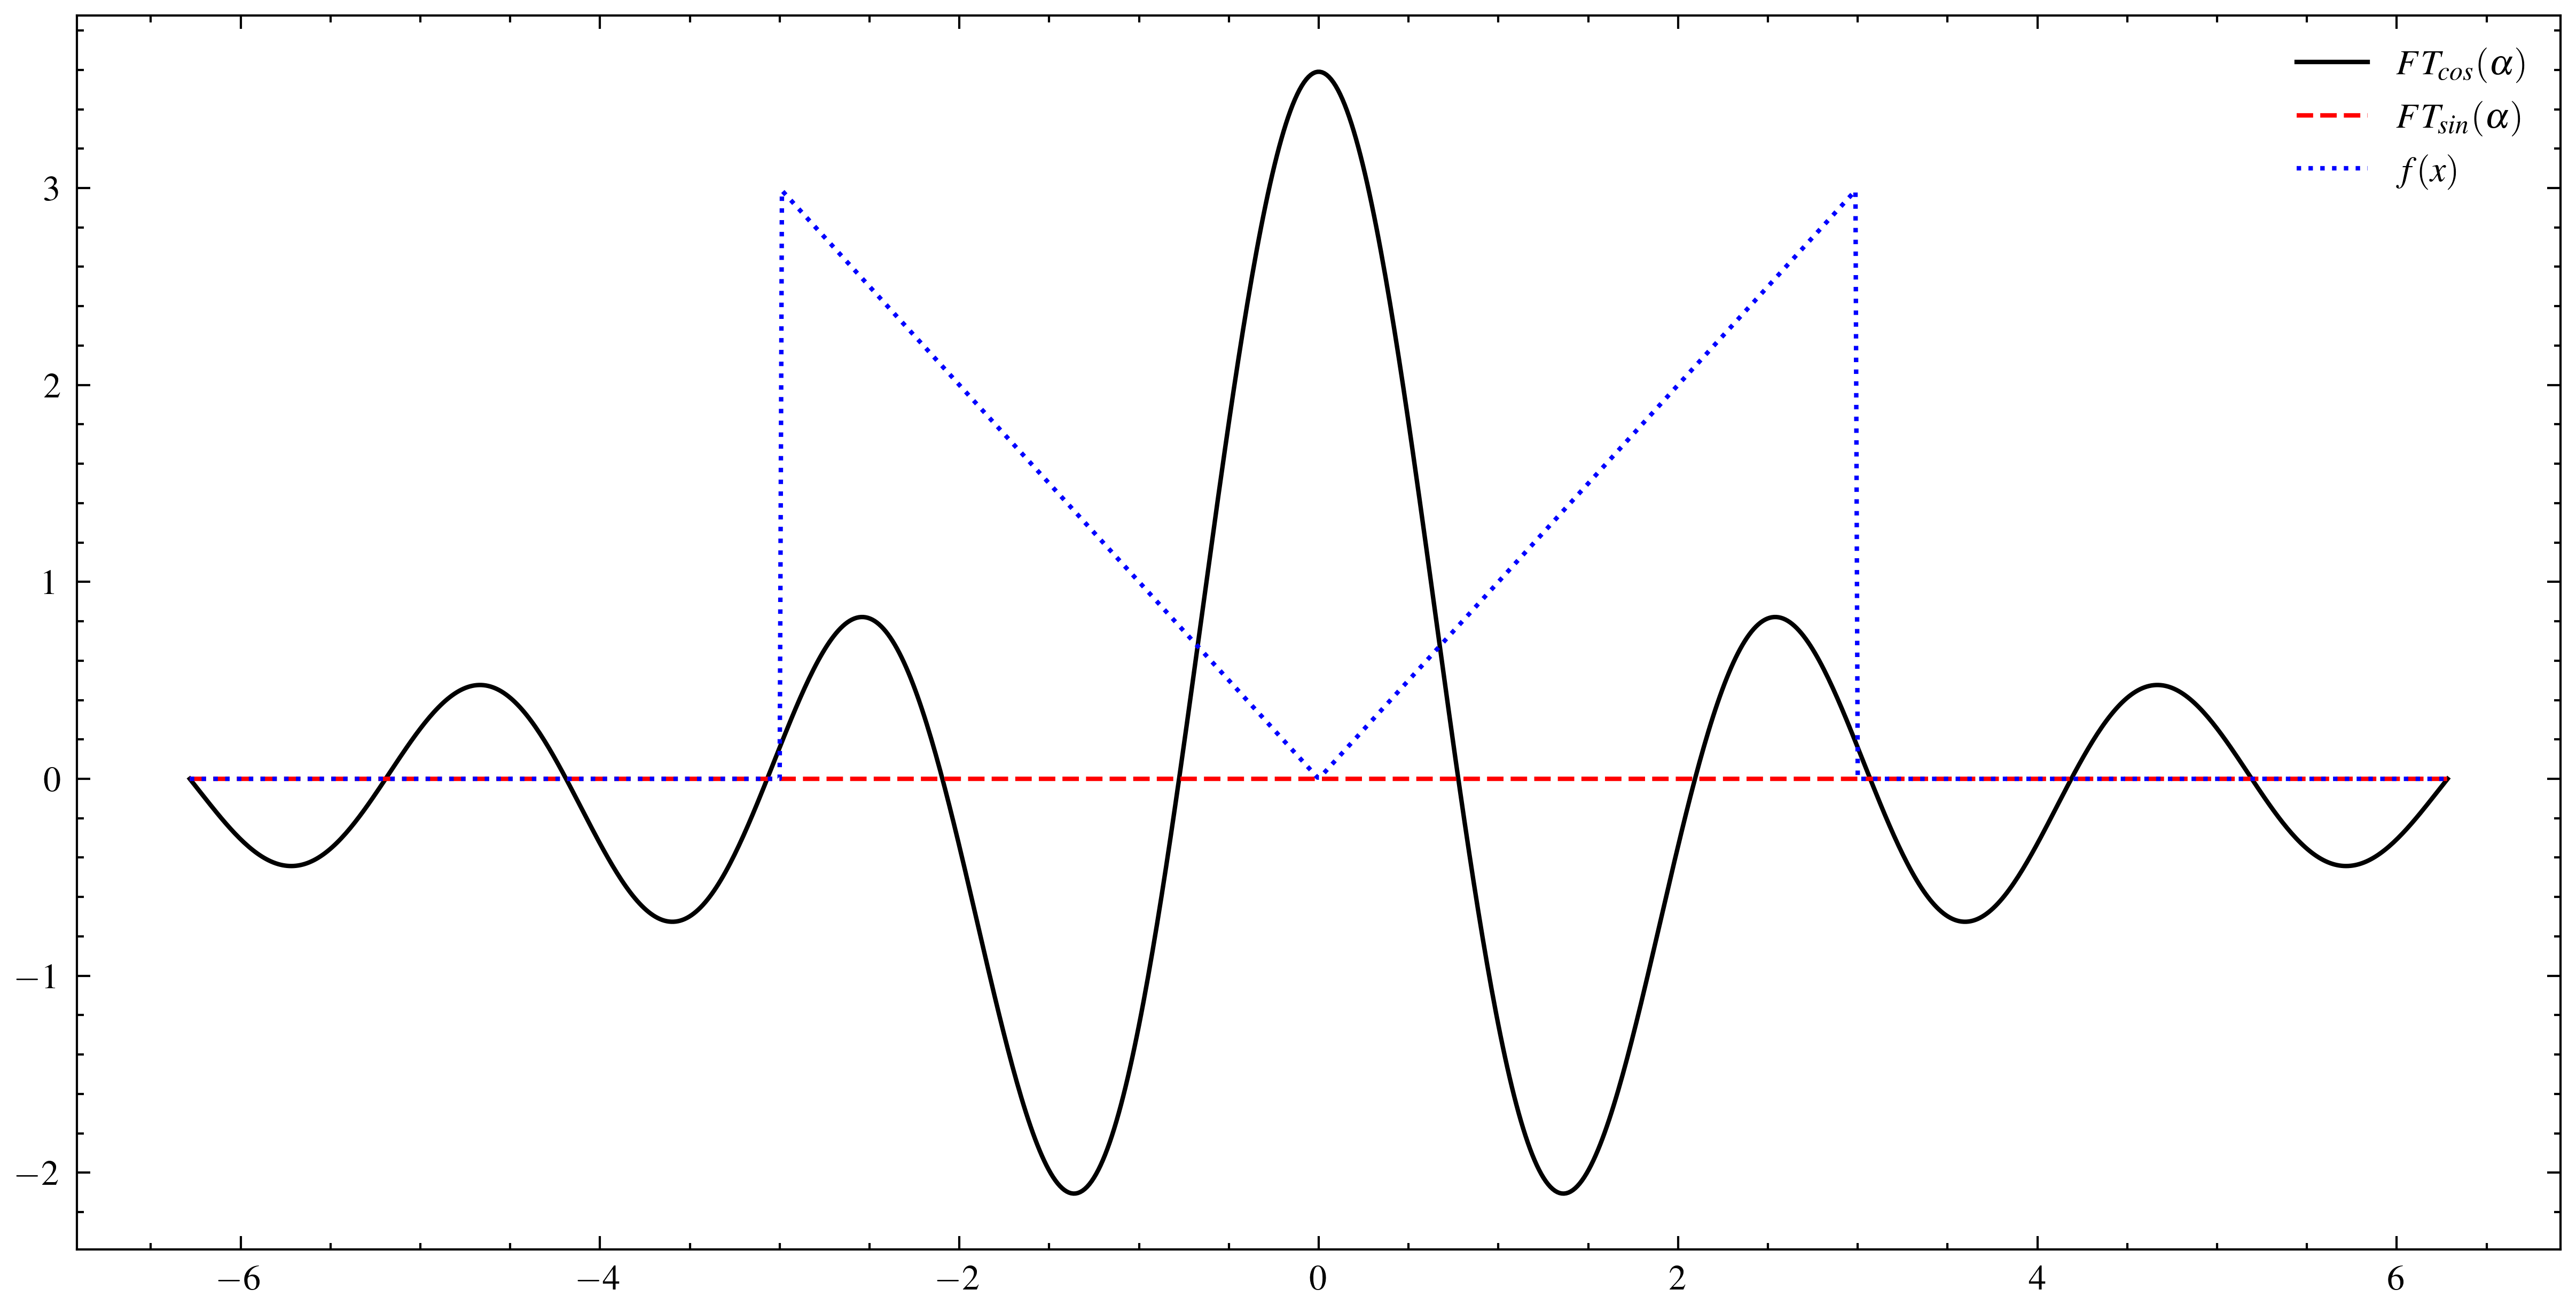

In [6]:
def f(x):
    if abs(x) <= 3:
        return abs(x)
    return 0.0


f = vectorize(f)
a = - 3
b = 3

ft_u, ft_v = fourier_transform(f, a, b)

x_i = - 2 * pi
x_f = 2 * pi
n = 1000

x = generate_points(x_i, x_f, n)

plt.plot(x, ft_u(x), label="$FT_{cos}(\\alpha)$")
plt.plot(x, ft_v(x), label="$FT_{sin}(\\alpha)$")
plt.plot(x, f(x), label="$f(x)$")
plt.legend()
plt.show()


### $$f(x) = \frac{sin(x)}{x}$$

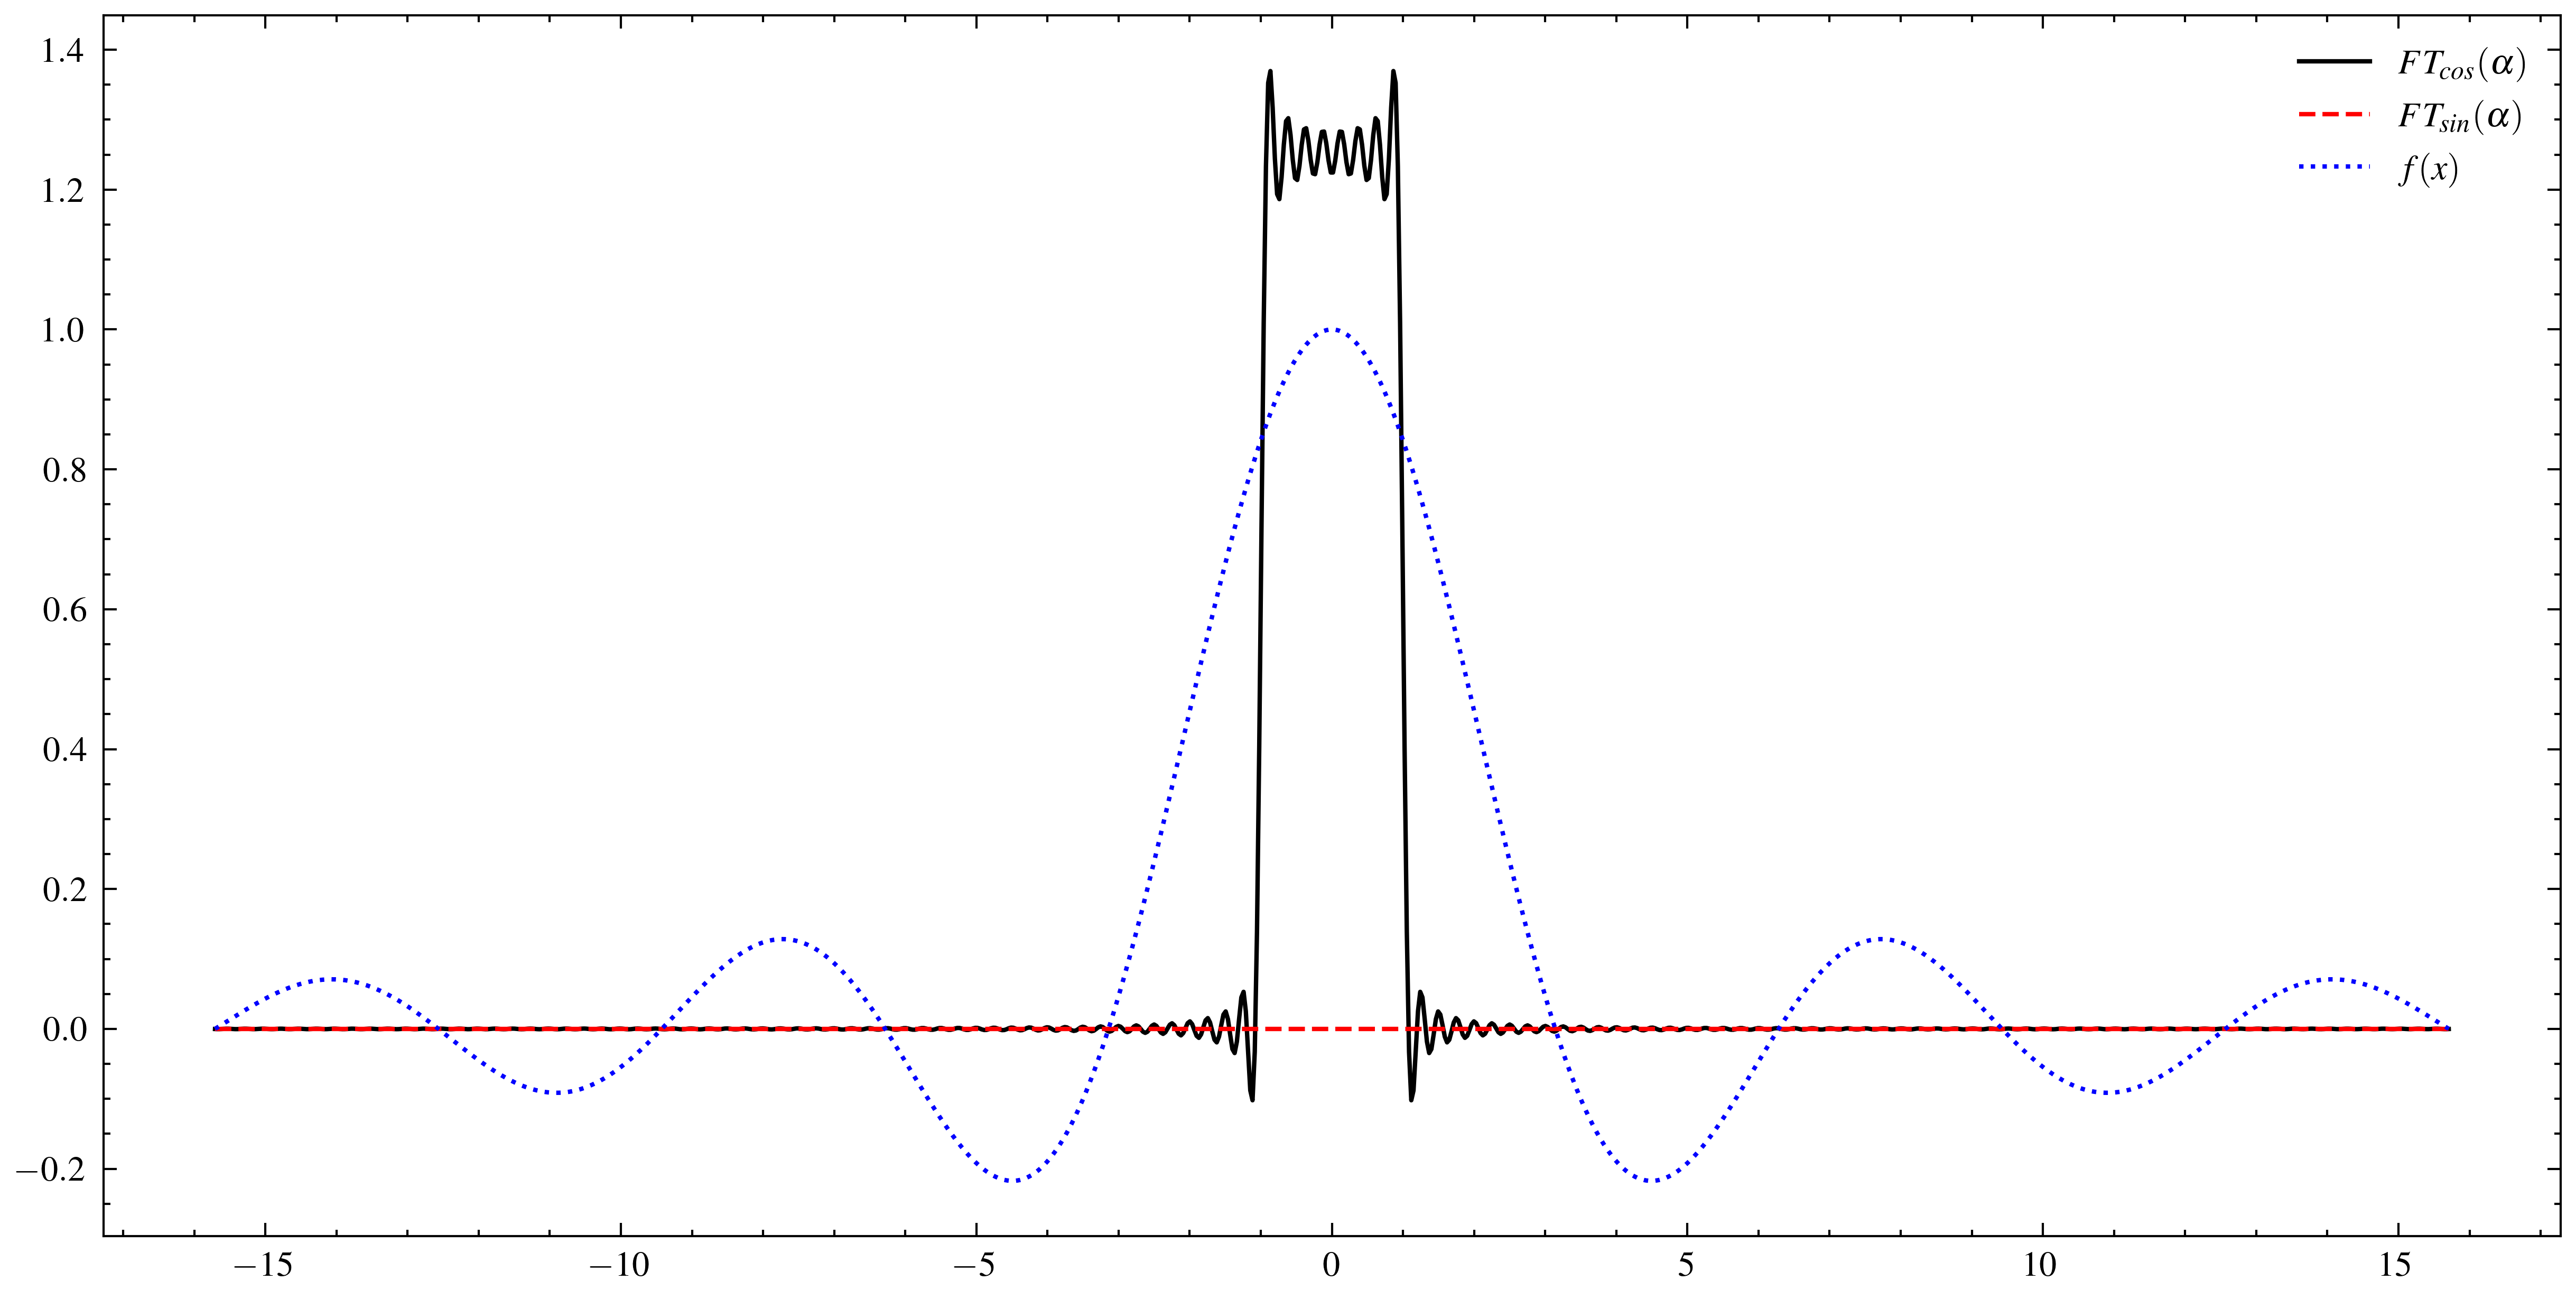

In [7]:
def f(x):
    return sin(x) / x


a = - 25
b = 25

ft_u, ft_v = fourier_transform(f, a, b)

x_i = - 5 * pi
x_f = 5 * pi
n = 1000

x = generate_points(x_i, x_f, n)

plt.plot(x, ft_u(x), label="$FT_{cos}(\\alpha)$")
plt.plot(x, ft_v(x), label="$FT_{sin}(\\alpha)$")
plt.plot(x, f(x), label="$f(x)$")
plt.legend()
plt.show()


### $$f(x) = e^{-x}, \ x \in (0, \infty)$$

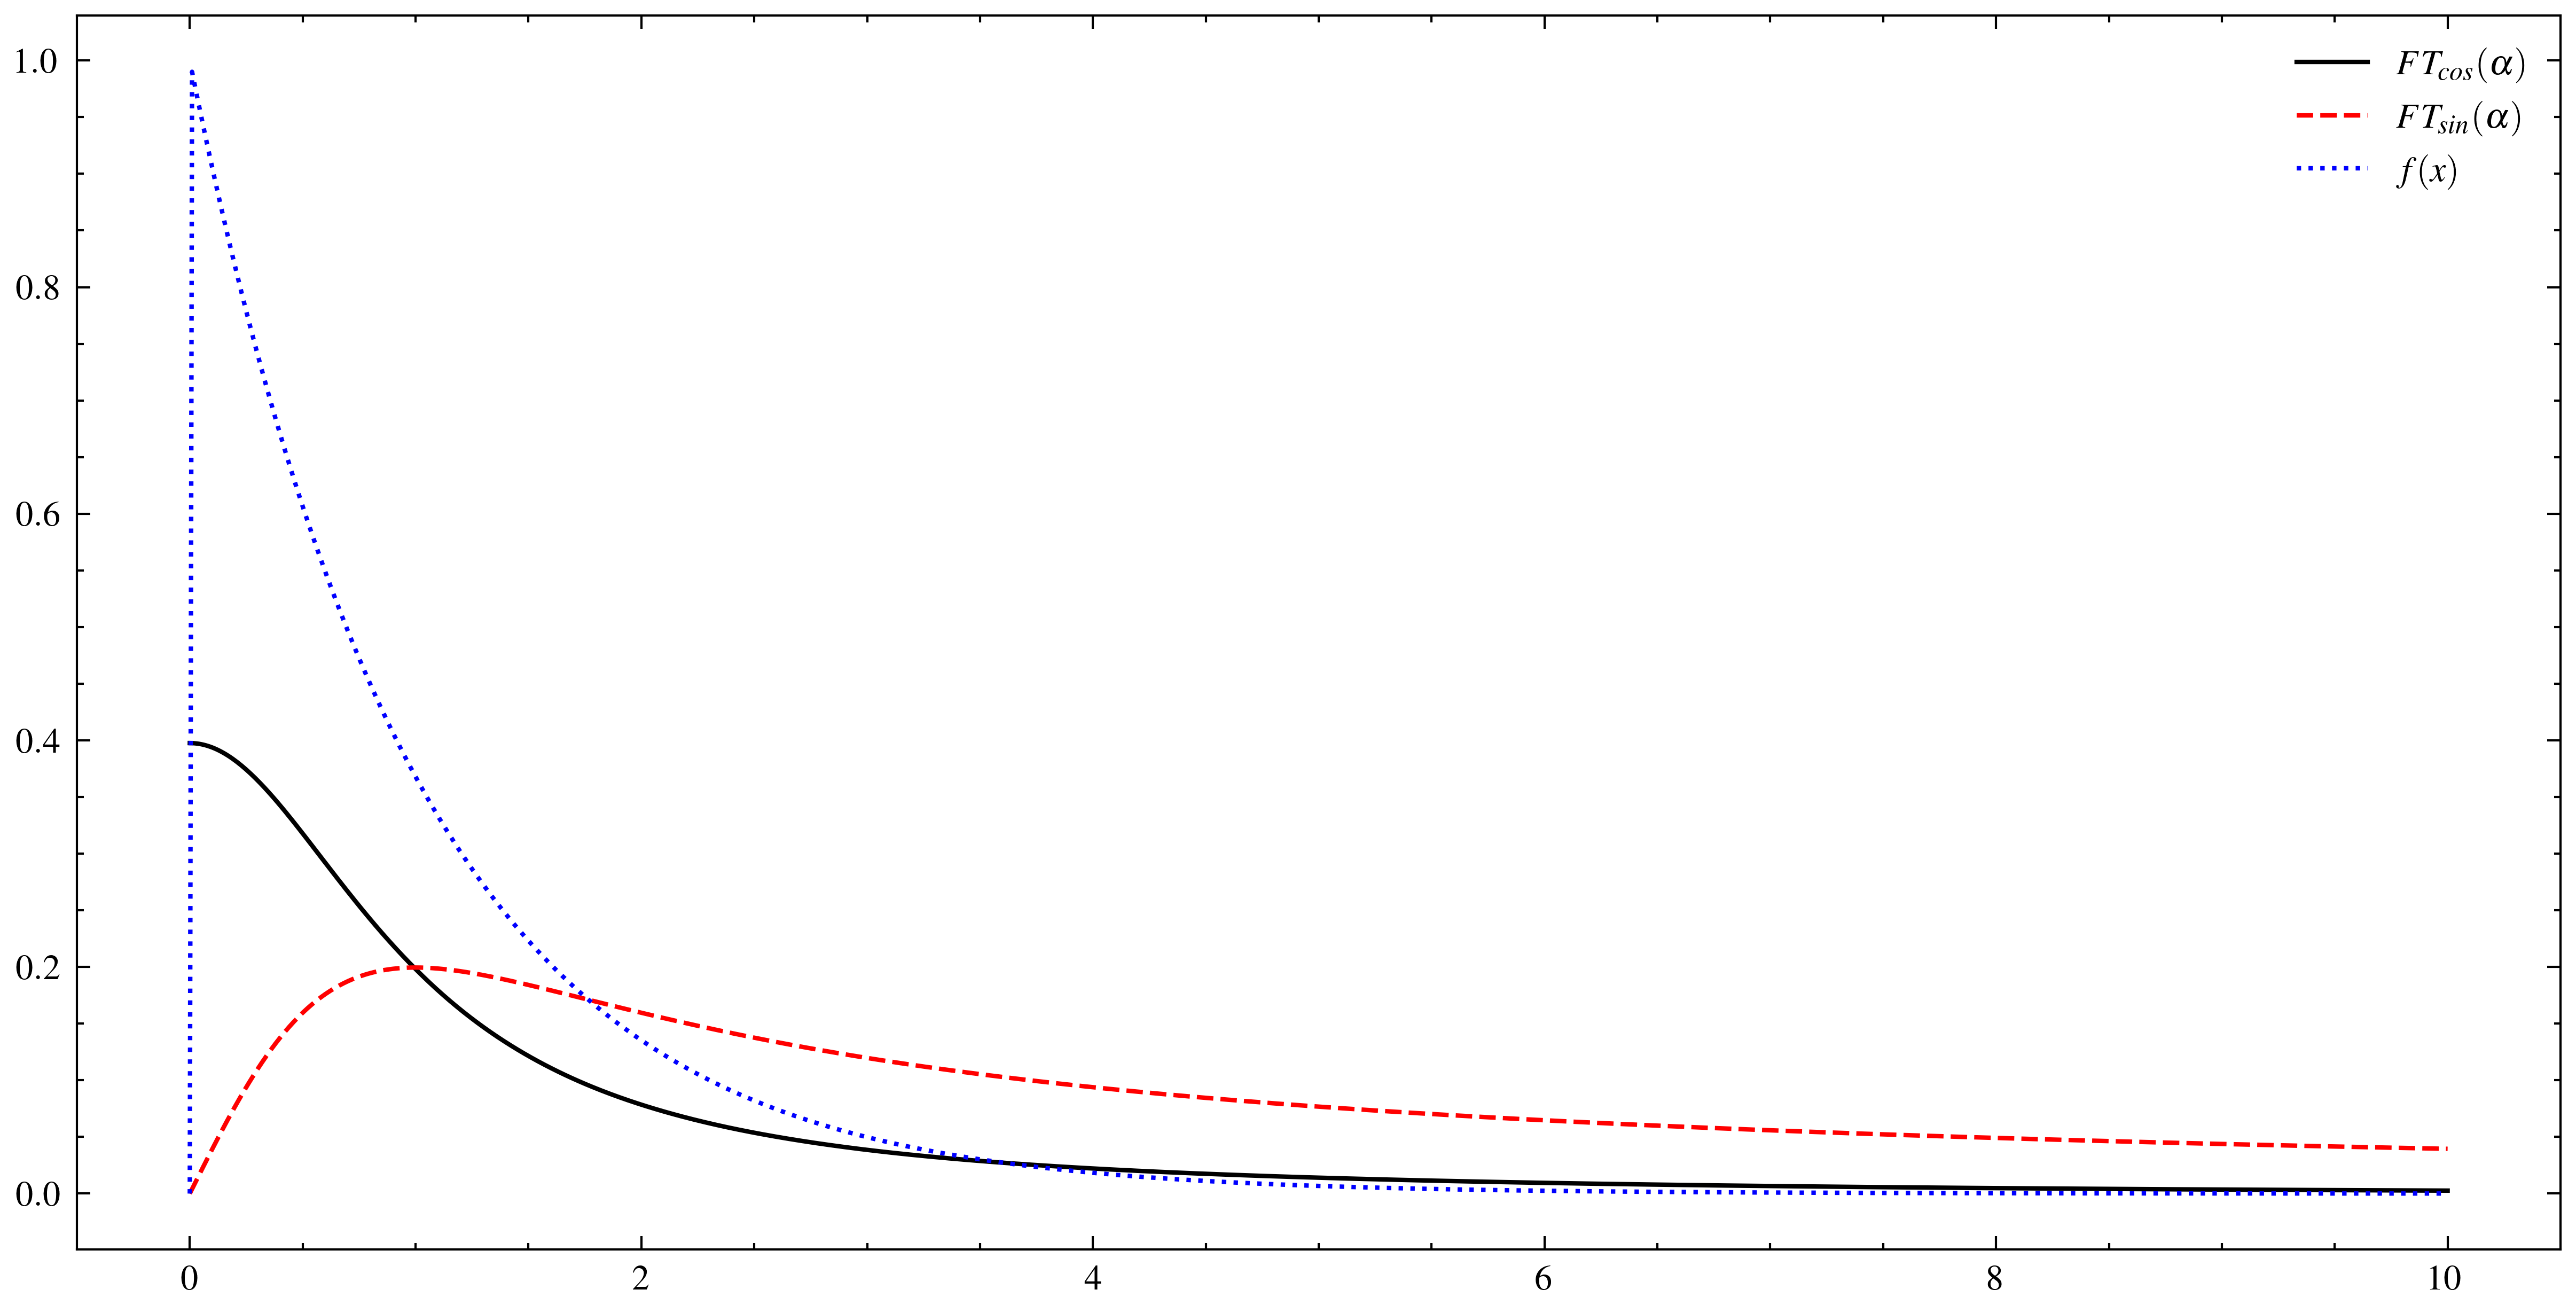

In [8]:
def f(x):
    if x > 0:
        return exp(-x)
    return 0.0


f = vectorize(f)
a = 0
b = 10

ft_u, ft_v = fourier_transform(f, a, b)

x_i = 0
x_f = 10
n = 1000

x = generate_points(x_i, x_f, n)

plt.plot(x, ft_u(x), label="$FT_{cos}(\\alpha)$")
plt.plot(x, ft_v(x), label="$FT_{sin}(\\alpha)$")
plt.plot(x, f(x), label="$f(x)$")
plt.legend()
plt.show()


### $$f(x) = cos(2x) + sin(8x)$$

**Note: Deliberately mentioning the frequency of the periodic function to verify the results of the Fourier transforms**

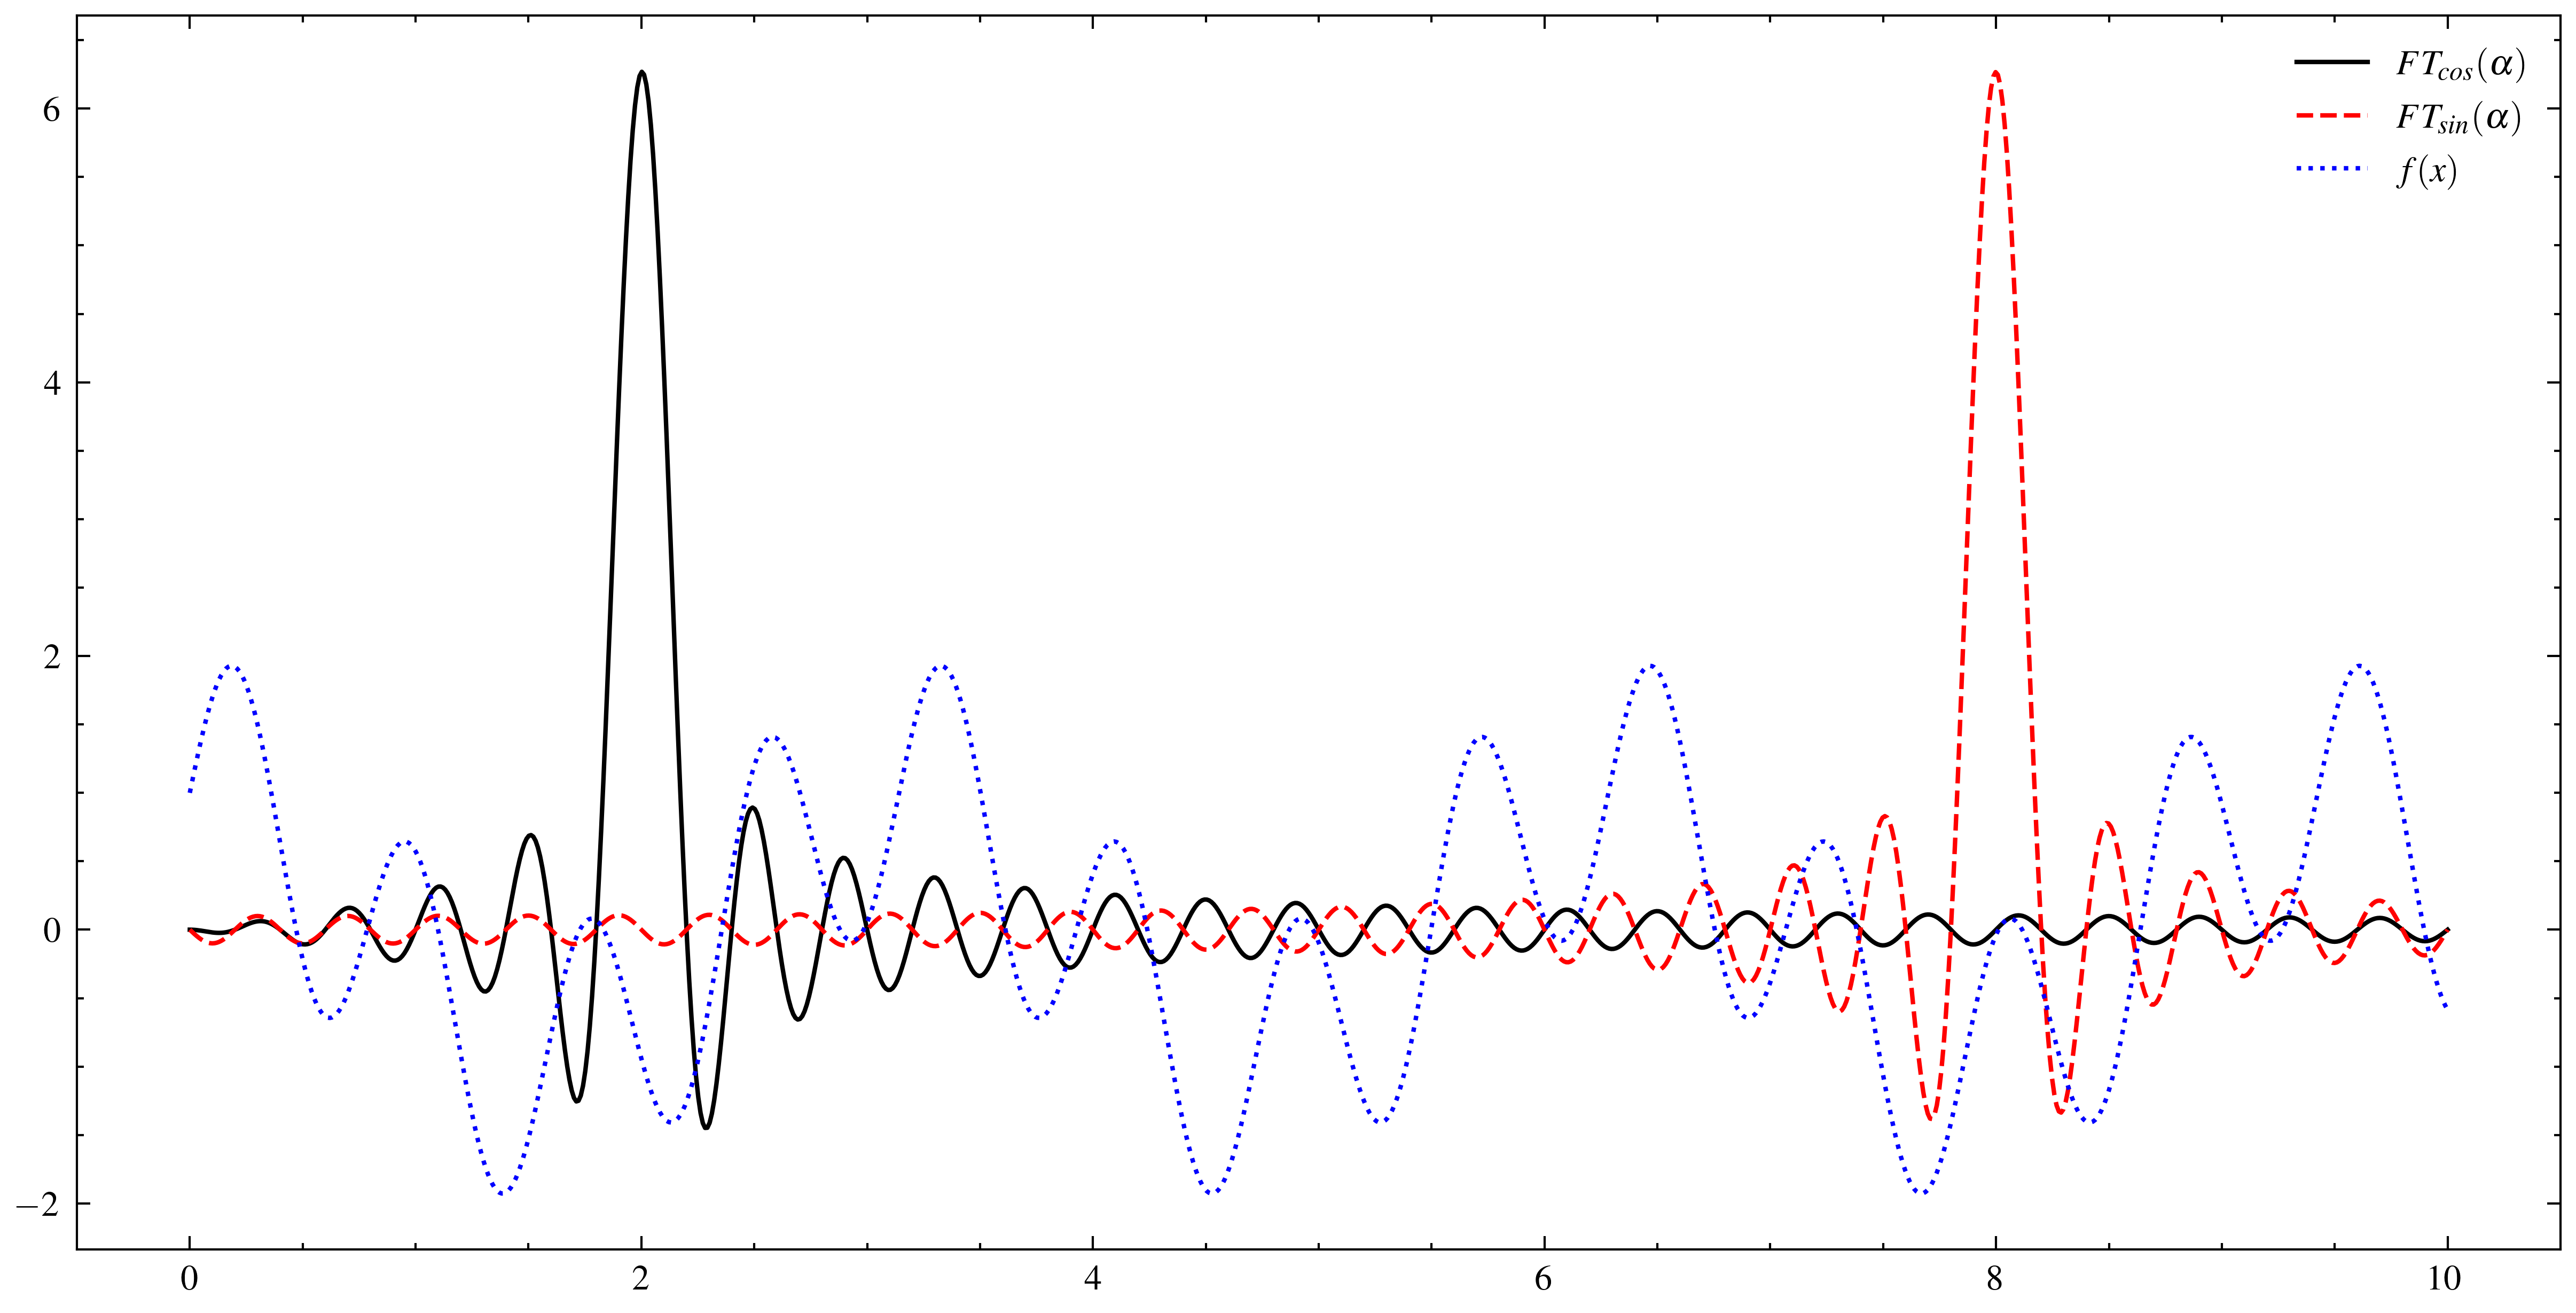

In [9]:
def f(x):
    return cos(2*x) + sin(8*x)


a = - 5 * pi
b = 5 * pi

ft_u, ft_v = fourier_transform(f, a, b)

x_i = 0
x_f = 10
n = 1000

x = generate_points(x_i, x_f, n)

plt.plot(x, ft_u(x), label="$FT_{cos}(\\alpha)$")
plt.plot(x, ft_v(x), label="$FT_{sin}(\\alpha)$")
plt.plot(x, f(x), label="$f(x)$")
plt.legend()
plt.show()
